In [1]:
import numpy as np 
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()
print('Digits dataset keys \n{}'.format(digits.keys()))

Digits dataset keys 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [2]:
print('dataset target name: \n{}'.format(digits.target_names))
print('shape of dataset: {} \nand target: {}'.format(digits.data.shape, digits.target.shape))
print('shape of the images: {}'.format(digits.images.shape))

dataset target name: 
[0 1 2 3 4 5 6 7 8 9]
shape of dataset: (1797, 64) 
and target: (1797,)
shape of the images: (1797, 8, 8)


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1.

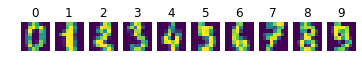

In [14]:
for i in range(0,10):
    plt.subplot(2, 10,i + 1)
    plt.axis('off')
    imside = int(np.sqrt(digits.data[i].shape[0]))
    im1 = np.reshape(digits.data[i],(imside,imside))
    print(im1)
    #plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.imshow(im1)
    plt.title(digits.target[i])
plt.show()

In [4]:
#from here we will be using the images. First we should flatten the images
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images,digits.target)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


In [28]:
# Create a classifier: a support vector classifier
#classifier = svm.SVC(gamma=0.001, verbose=True)
classifier = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

#fit to the training data
classifier.fit(X_train,y_train)

"""
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
"""

[LibSVM]

"\nSVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False)\n"

In [29]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

In [30]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00        44
           3       0.97      0.97      0.97        35
           4       0.98      1.00      0.99        42
           5       0.98      1.00      0.99        49
           6       1.00      1.00      1.00        42
           7       0.98      0.98      0.98        48
           8       0.95      0.93      0.94        42
           9       0.96      0.92      0.94        49

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98 

In [ ]:
"""
precision is the fraction of relevant instances among the retrieved instances and is defined as:
precision = tp / (tp + fp) or (true positives)/(prediced positives)

recall is the fraction of relevant instances that have been retrieved over total relevant instances in the image, and is defined as
recall = tp / (tp + fn) or (true positives)/(actual positives)
Where, tp = true positives, fp = false positives anf fn = false negatives. Recall in this context is also referred to as the true positive rate or sensitivity, and precision is also referred to as positive predictive value (PPV).

f1-score: is a measure of a test's accuracy. It considers both the precision and the recall to compute the score. The f1-score can be interpreted as a weighted average of the precision and recall, where an f1-score reaches its best value at 1 and worst at 0.
The general formula is: 2.(precision.recall)/(precision+recall)
The f1-score regulates bot precision and recall.
"""